<a href="https://colab.research.google.com/github/Inezdea/UAS_AI_LSTM_HargaEmas/blob/main/UAS_AI_LSTM_HargaEmas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install dan Import
!pip install pandas numpy scikit-learn matplotlib tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
from google.colab import files
uploaded = files.upload()  # Upload gold_price.csv

df = pd.read_csv('gold_price.csv')
df.head()

Saving gold_price.csv to gold_price (1).csv


,Year,Rs(24k)
0,1960,111.87
1,1961,119.35
2,1962,119.75
3,1963,97.00
4,1964,63.25


<Axes: title={'center': 'Harga Emas'}, xlabel='Year'>

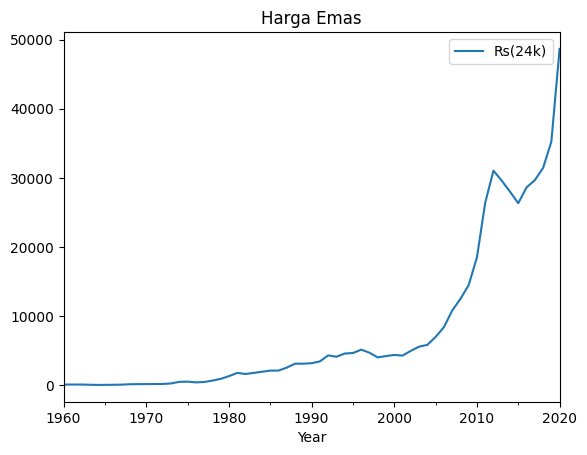

In [4]:
# Ubah kolom 'Year' jadi datetime dan set sebagai index
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

# Gunakan hanya harga emas ('Rs(24k)')
data = df[['Rs(24k)']]
data = data.dropna()  # Drop NA jika ada

# Scaling data agar LSTM lebih stabil
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Visualisasi
data.plot(title="Harga Emas")

In [7]:
# Fungsi untuk membuat data time series
def create_dataset(dataset, time_step=10):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(scaled_data, time_step)

# Reshape untuk LSTM [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split train-test (80:20)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [8]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Kompilasi
model.compile(optimizer='adam', loss='mean_squared_error')

# Training
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 603ms/step - loss: 0.0102 - val_loss: 0.3535
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0058 - val_loss: 0.2762
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0044 - val_loss: 0.2116
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0032 - val_loss: 0.1665
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0036 - val_loss: 0.1428
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0034 - val_loss: 0.1380
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0027 - val_loss: 0.1382
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0022 - val_loss: 0.1334
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0020 - val_loss: 0.1230
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0023 - val_loss: 0.1056
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0021 - val_loss: 0.0857
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0014 - val_loss: 0.0643
Epoch 13/20

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


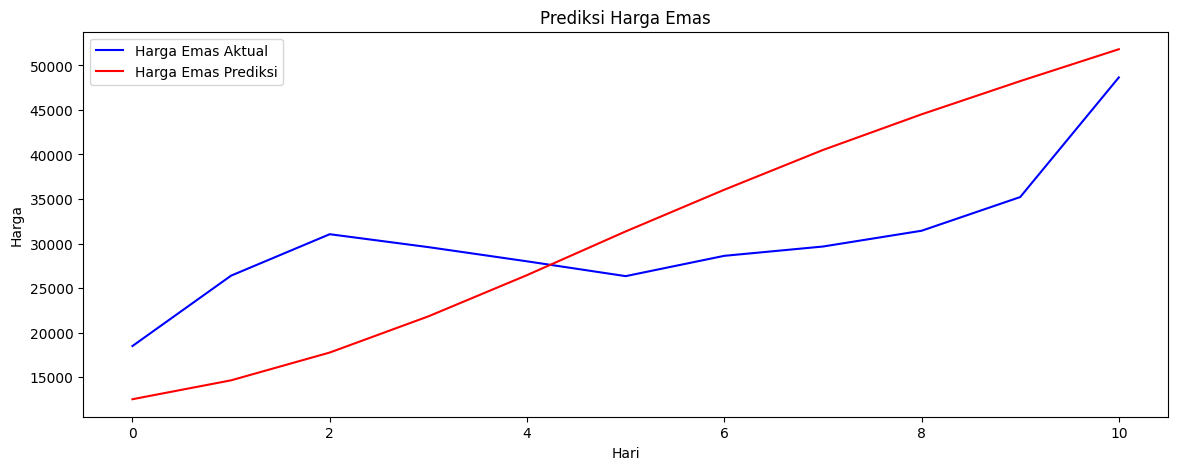

In [9]:
# Prediksi
predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price.reshape(-1,1))
real_price = scaler.inverse_transform(y_test.reshape(-1,1))

# Visualisasi hasil
plt.figure(figsize=(14,5))
plt.plot(real_price, color='blue', label='Harga Emas Aktual')
plt.plot(predicted_price, color='red', label='Harga Emas Prediksi')
plt.title('Prediksi Harga Emas')
plt.xlabel('Hari')
plt.ylabel('Harga')
plt.legend()
plt.show()

In [10]:
model.save("model_prediksi_emas.h5")